In [1]:
#tf的feed程序
import tensorflow as tf

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7], input2:[2.]}))



[array([14.], dtype=float32)]


In [3]:
#tf的fetch程序
import tensorflow as tf

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)

with tf.Session() as sess:
    result = sess.run([mul, intermed])   #需要获取的多个 tensor 值，在 op 的一次运行中一起获得（而不是逐个去获取 tensor）。
    print(result)

[21.0, 7.0]


In [5]:
#tf的fetch程序模仿
import tensorflow as tf
input1 = tf.constant(4)
input2 = tf.constant(7)
input3 = tf.constant(21)
intermed = tf.add(input2, input3)
div = tf.divide(intermed, input1)
with tf.Session() as sess:
    result = sess.run([div, intermed])
    print(result)

[7.0, 28]


In [7]:
#tf_variable程序
import tensorflow as tf

state = tf.Variable(0, name = "counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print("state", sess.run(state))
    for _ in range(5):
        sess.run(update)
        print("update:", sess.run(state))

state 0
update: 1
update: 2
update: 3
update: 4
update: 5


In [2]:
#tf的graph
import tensorflow as tf


# 构造器的返回值代表该常量 op 的返回值.
matrix1 = tf.constant([[3., 3.]])
# 创建另外一个常量 op, 产生一个 2x1 矩阵.
matrix2 = tf.constant([[2.],[2.]])

# 创建一个矩阵乘法 matmul op , 把 'matrix1' 和 'matrix2' 作为输入.
# 返回值 'product' 代表矩阵乘法的结果.
product = tf.matmul(matrix1, matrix2)

'''
默认图现在有三个节点, 两个 constant() op, 和一个matmul() op. 
为了真正进行矩阵相乘运算, 并得到矩阵乘法的结果, 必须在会话里启动这个图.
启动图的第一步是创建一个 Session 对象, 如果无任何创建参数, 会话构造器将启动默认图.
'''
# 启动默认图.
sess = tf.Session()

# 调用 sess 的 'run()' 方法来执行矩阵乘法 op, 传入 'product' 作为该方法的参数. 
# 'product' 代表了矩阵乘法 op 的输出, 传入它是向方法表明, 我们希望取回矩阵乘法 op 的输出.
#
# 整个执行过程是自动化的, 会话负责传递 op 所需的全部输入. op 通常是并发执行的.
# 
# 函数调用 'run(product)' 触发了图中三个 op (两个常量 op 和一个矩阵乘法 op) 的执行.
#
# 返回值 'result' 是一个 numpy `ndarray` 对象.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# 任务完成, 关闭会话.
sess.close()
'''
session对象在使用完后需要关闭以释放资源. 除了显式调用 close 外, 也可以使用 “with” 代码块来自动完成关闭动作.

with tf.Session() as sess:
  result = sess.run([product])
  print (result)
'''


[[12.]]


'\nsession对象在使用完后需要关闭以释放资源. 除了显式调用 close 外, 也可以使用 “with” 代码块来自动完成关闭动作.\n\nwith tf.Session() as sess:\n  result = sess.run([product])\n  print (result)\n'

In [3]:
#tf的tensorboard程序
import tensorflow as tf  

# 定义一个计算图，实现两个向量的减法操作  
# 定义两个输入，a为常量，b为变量  
a=tf.constant([10.0, 20.0, 40.0], name='a')  
b=tf.Variable(tf.random_uniform([3]), name='b')  
output=tf.add_n([a,b], name='add')  

# 生成一个具有写权限的日志文件操作对象，将当前命名空间的计算图写进日志中  
writer=tf.summary.FileWriter('logs', tf.get_default_graph()) 
writer.close()

#启动tensorboard服务（在命令行启动）
#tensorboard --logdir logs

#启动tensorboard服务后，复制地址并在本地浏览器中打开，

ERROR! Session/line number was not unique in database. History logging moved to new session 334



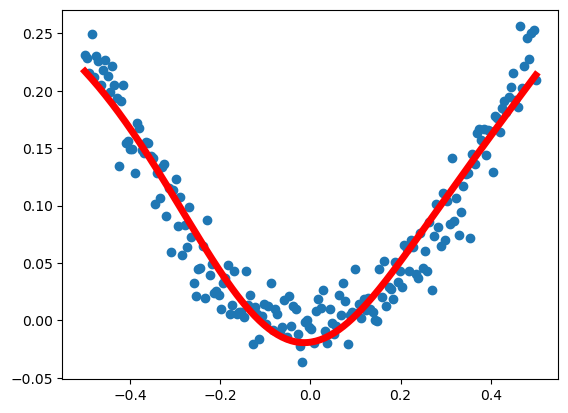

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#使用numpy生成200个随机点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise
 
#定义两个placeholder存放输入数据
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])
 
#定义神经网络中间层
Weights_L1=tf.Variable(tf.random_normal([1,10]))
biases_L1=tf.Variable(tf.zeros([1,10]))    #加入偏置项
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1
L1=tf.nn.tanh(Wx_plus_b_L1)   #加入激活函数

#定义神经网络输出层
Weights_L2=tf.Variable(tf.random_normal([10,1]))
biases_L2=tf.Variable(tf.zeros([1,1]))  #加入偏置项
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)   #加入激活函数

#定义损失函数（均方差函数）
loss=tf.reduce_mean(tf.square(y-prediction))
#定义反向传播算法（使用梯度下降算法训练）
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    #训练2000次
    for i in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
 
    #获得预测值
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
 
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)   #散点是真实值
    plt.plot(x_data,prediction_value,'r-',lw=5)   #曲线是预测值
    plt.show()

